In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('data/data.xlsx', parse_dates=['日期'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35136 entries, 0 to 35135
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   日期            35136 non-null  datetime64[ns]
 1   时点            35136 non-null  object        
 2   原始功率预测均值（MW）  35136 non-null  float64       
 3   日前-实时         35136 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ MB


In [57]:
bins = np.linspace(df['原始功率预测均值（MW）'].min(), df['原始功率预测均值（MW）'].max(), 25)
df['forecast_bin'] = pd.cut(df['原始功率预测均值（MW）'], bins)

各预测负荷率分箱下新能源披露偏差为正的概率：
forecast_bin
(0.283, 7.539]        0.408638
(7.539, 14.794]       0.365897
(14.794, 22.05]       0.374656
(22.05, 29.306]       0.397476
(29.306, 36.561]      0.429265
(36.561, 43.817]      0.442643
(43.817, 51.072]      0.497912
(51.072, 58.328]      0.488701
(58.328, 65.584]      0.534456
(65.584, 72.839]      0.541667
(72.839, 80.095]      0.590100
(80.095, 87.351]      0.630525
(87.351, 94.606]      0.638528
(94.606, 101.862]     0.687888
(101.862, 109.117]    0.811623
(109.117, 116.373]    0.819527
(116.373, 123.629]    0.880866
(123.629, 130.884]    0.910072
(130.884, 138.14]     0.940678
(138.14, 145.396]     0.935780
(145.396, 152.651]    0.991736
(152.651, 159.907]    1.000000
(159.907, 167.162]    1.000000
(167.162, 174.418]    1.000000
Name: 日前-实时, dtype: float64


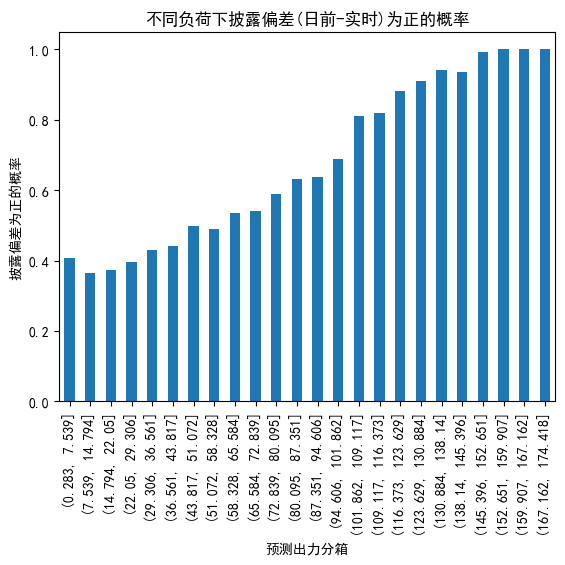

In [58]:
positive_prob = df.groupby('forecast_bin', observed=False)['日前-实时'].apply(
    lambda x: (x > 0).mean()
)
print("各预测负荷率分箱下新能源披露偏差为正的概率：")
print(positive_prob)

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 避免负号显示为方块
plt.rcParams['axes.unicode_minus'] = False
positive_prob.plot(kind='bar')
plt.xlabel('预测出力分箱')
plt.ylabel('披露偏差为正的概率')
plt.title('不同负荷下披露偏差(日前-实时)为正的概率')
plt.show()

各预测负荷率分箱下新能源披露偏差为正的概率：
forecast_bin
(0.538, 4.527]      0.480392
(4.527, 8.516]      0.435868
(8.516, 12.506]     0.405444
(12.506, 16.495]    0.378238
(16.495, 20.484]    0.287908
(20.484, 24.473]    0.356044
(24.473, 28.462]    0.245070
(28.462, 32.452]    0.342298
(32.452, 36.441]    0.334559
(36.441, 40.43]     0.250000
(40.43, 44.419]     0.314286
(44.419, 48.408]    0.436508
(48.408, 52.398]    0.428571
(52.398, 56.387]    0.429412
(56.387, 60.376]    0.462500
(60.376, 64.365]    0.464286
(64.365, 68.355]    0.506494
(68.355, 72.344]    0.426667
(72.344, 76.333]    0.494118
(76.333, 80.322]    0.456522
(80.322, 84.311]    0.617647
(84.311, 88.301]    0.933333
(88.301, 92.29]     1.000000
(92.29, 96.279]     1.000000
Name: 日前-实时, dtype: float64


C:\Users\SP007\AppData\Local\Temp\ipykernel_19800\633847065.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[(60.376, 64.365], (60.376, 64.365], (60.376, 64.365], (60.376, 64.365], (60.376, 64.365], ..., (20.484, 24.473], (20.484, 24.473], (20.484, 24.473], (20.484, 24.473], (20.484, 24.473]]
Length: 6222
Categories (24, interval[float64, right]): [(0.538, 4.527] < (4.527, 8.516] < (8.516, 12.506] < (12.506, 16.495] ... (80.322, 84.311] < (84.311, 88.301] < (88.301, 92.29] < (92.29, 96.279]]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_filtered.loc[:, 'forecast_bin'] = pd.cut(


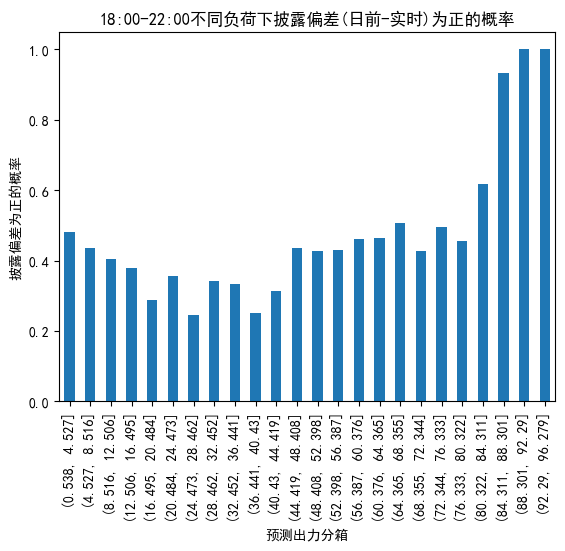

In [61]:
df['时刻'] = pd.to_datetime(df['日期'].astype(str) + ' ' + df['时点'].astype(str), errors='coerce')

# Step 3: 筛选时刻在 18:00 至 21:45
mask = (df['时刻'].dt.time >= pd.to_datetime('18:00').time()) & (df['时刻'].dt.time <= pd.to_datetime('22:00').time())
df_filtered = df[mask]

df_filtered.loc[:, 'forecast_bin'] = pd.cut(
    df_filtered['原始功率预测均值（MW）'],
    bins=np.linspace(
        df_filtered['原始功率预测均值（MW）'].min(),
        df_filtered['原始功率预测均值（MW）'].max(),
        25
    )
)
positive_prob = df_filtered.groupby('forecast_bin', observed=False)['日前-实时'].apply(
    lambda x: (x > 0).mean()
)
print("各预测负荷率分箱下新能源披露偏差为正的概率：")
print(positive_prob)

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 避免负号显示为方块
plt.rcParams['axes.unicode_minus'] = False
positive_prob.plot(kind='bar')
plt.xlabel('预测出力分箱')
plt.ylabel('披露偏差为正的概率')
plt.title('18:00-22:00不同负荷下披露偏差(日前-实时)为正的概率')
plt.show()